In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # plotting
from sklearn.cluster import KMeans # loading k means algorithm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Density distribution plots

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

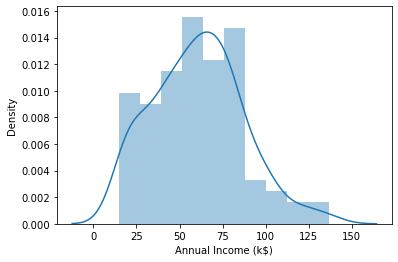

In [4]:
sns.distplot(df['Annual Income (k$)']) # distribution plots
# our data shape is normal distirbution
df.columns

<Figure size 432x288 with 0 Axes>

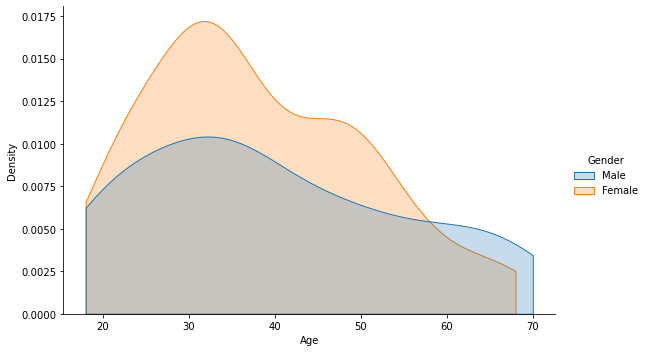

<Figure size 432x288 with 0 Axes>

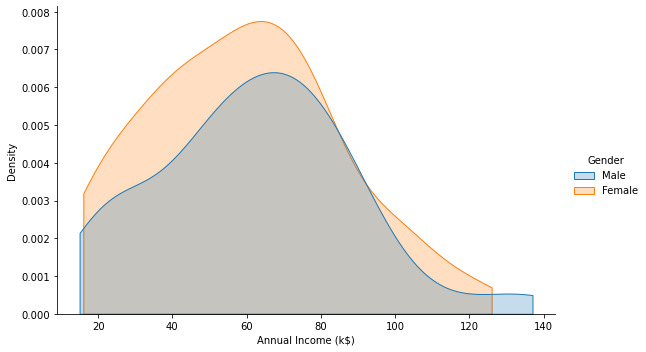

<Figure size 432x288 with 0 Axes>

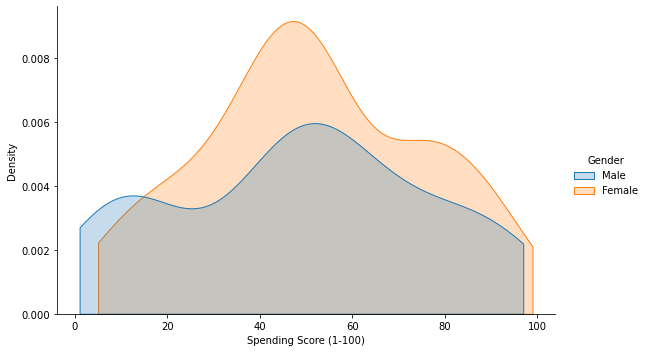

In [5]:
# we use a for loop to makes distribution of all the variables
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(data=df, hue='Gender', x=i, kind='kde', fill=True, 
                height=5,aspect=1.6, cut=0, bw_adjust=1)

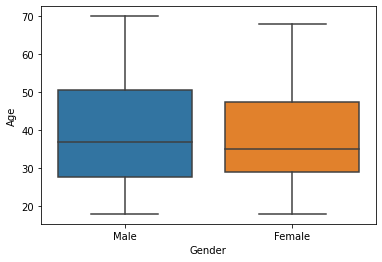

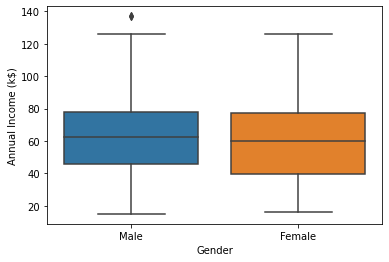

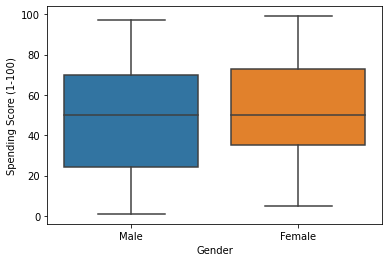

In [6]:
# lets use a box plot for more visualisations
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=i)

In [7]:
df['Gender'].value_counts(normalize = True)
# normalize to see percentages of gender in the data

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

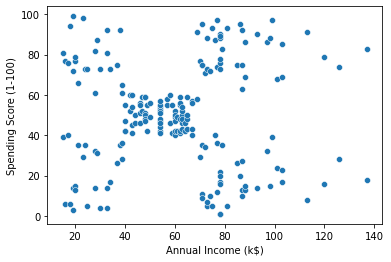

In [8]:
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)')

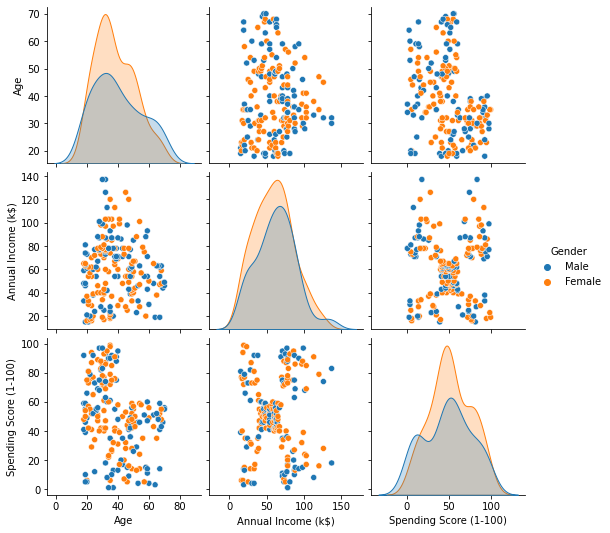

In [9]:
# use pair plots to see all the scatterplots and histograms
df1=df.drop('CustomerID', axis=1) # axis 1 dropping customer ID column level
sns.pairplot(data=df1, hue='Gender')

In [ ]:
# From the above plot it seems that there is huge percentage of female
# customers in the data set. It will be explored further.

In [10]:
df1.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
# Then lets look at the mean age, annual income and spending score according
# to gender. Annual income for male is higher and 
# the spending score is a bit higher for female customers.

In [11]:
# correlation
df1.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [ ]:
# Lets generate the correlation for all the columns
# Spending score and age has a negative correlation, which means with age
# increasing the spending score decreases
# And annual income and spending score has a slightly positive correlation

<AxesSubplot:>

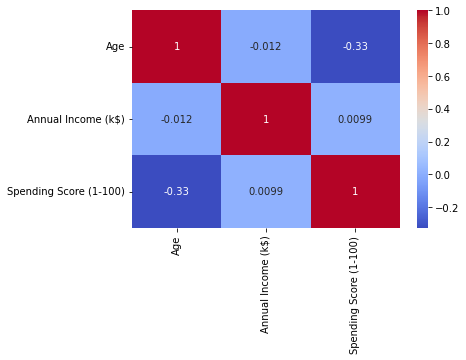

In [12]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

# Clustering (univariate clustering, bivariate clustering)

In [13]:
clustering1 = KMeans(n_clusters=6)
df1.columns # to see columns of the data frame

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [14]:
# Lets start with choosing a random or a close value to what we think
# number of clusters could be. 

In [15]:
clustering1.fit(df1[['Annual Income (k$)']]) 
# Fit data on the clustering algo 

KMeans(n_clusters=6)

In [16]:
clustering1.labels_ # clusters showing default clusters = 8

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [18]:
# Lets see labels of clusters and add these as a new column in the data set 

In [20]:
df1['Income cluster'] = clustering1.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [21]:
df1['Income cluster'].value_counts()

4    48
0    42
5    42
3    32
1    28
2     8
Name: Income cluster, dtype: int64

In [22]:
clustering1.inertia_ 
# distance between the centroid, we would want to lower this number 5050.904761904766

5050.904761904766

# Elbow Method for optimal value of k in KMeans

In [23]:
inertia_scores= []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [24]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3941.41636141636,
 2822.4996947496957,
 2208.8120490620495,
 1758.1453823953825]

Text(0, 0.5, 'Inertia')

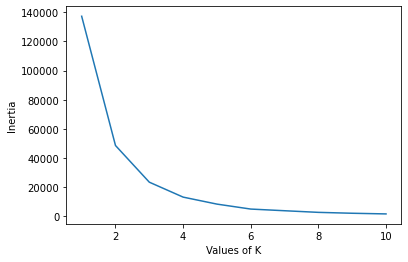

In [25]:
plt.plot(range(1,11),inertia_scores) # elBow shows 3
plt.xlabel('Values of K')
plt.ylabel('Inertia')

In [ ]:
# By looking at below plot we can see elbow starts between 2 and 4.
# We chose 3 as number of clusters and retrain our model.

In [26]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df1[['Annual Income (k$)']])
clustering1.inertia_
df1['Income cluster']= clustering1.labels_
df1['Income cluster'].value_counts()

0    90
1    74
2    36
Name: Income cluster, dtype: int64

In [27]:
df1.groupby('Income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [ ]:
# Mean values of each cluster in univariate clustering 

In [28]:
clustering2 = KMeans(n_clusters=3)
clustering2.fit(df1[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
# add cluster column to the data frame 
df1['Spending and Income cluster']= clustering2.labels_ 
#df1['Income cluster'].value_counts()
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,2
2,Female,20,16,6,1,2
3,Female,23,16,77,1,2
4,Female,31,17,40,1,2


Text(0, 0.5, 'Inertia')

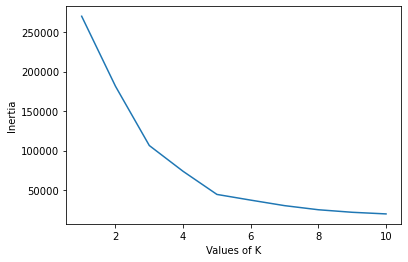

In [29]:
inertia_scores2= []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df1[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)  
plt.plot(range(1,11),inertia_scores2)
plt.xlabel('Values of K')
plt.ylabel('Inertia')

In [ ]:
# We see 5 clusters at the elbow. lets train again with 5 clusters.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

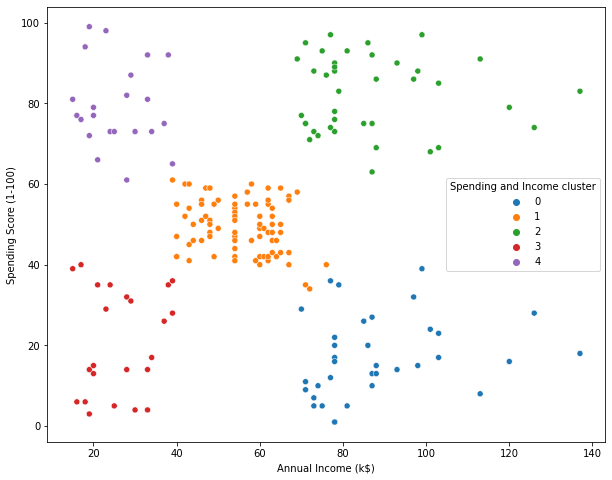

In [30]:
# elbow seems 5 here so lets train again on 5 clusters
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df1[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df1['Spending and Income cluster']= clustering2.labels_
#df1[‘Income cluster’].value_counts()
plt.figure(figsize=(10,8))
sns.scatterplot(data=df1, x='Annual Income (k$)', y ='Spending Score (1-100)', hue='Spending and Income cluster', palette='tab10')

In [31]:
# lets now find out the center of each cluster, this will give us an 
# idea of centers of each clusters.
# Data point closest to any of these center will be added to that particular cluster.
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,26.304348,20.913043
4,25.727273,79.363636


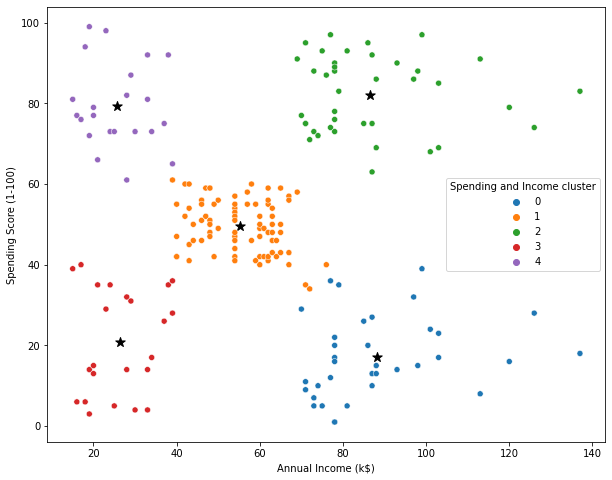

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df1, x='Annual Income (k$)', y ='Spending Score (1-100)', hue='Spending and Income cluster', palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [33]:
pd.crosstab(df1['Spending and Income cluster'],df1['Gender'],normalize='index') 
# cluster 1 is spending the highest

Gender,Female,Male
Spending and Income cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [34]:
df1.groupby('Spending and Income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636
